[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sadiq937/Shaik_DM/blob/main/ps1.ipynb).

## **PS-1** -*By Fnu Shaik Mohammed Sadiq* 

In [5]:
import pandas as pd
import pyreadstat
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Seaborn for visualizations
sns.set(style="darkgrid")

# Function to display descriptive statistics
def display_stats(df, name):
    print(f"\nDescriptive Statistics for {name}:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())

# Function to plot distributions
def plot_distributions(df, column, name):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f"Distribution of {column} in {name}")
    plt.show()

# 1. Read datasets in different formats (.html, .parquet, .xml, .csv, .json)

# Read HTML file (accounts.html)
accounts_df = pd.read_html('accounts.html')[0]
print("Accounts Data (HTML):")
print(accounts_df.head())

# Read Parquet file (data_dictionary.parquet)
data_dict_df = pd.read_parquet('data_dictionary.parquet')
print("\nData Dictionary (Parquet):")
print(data_dict_df.head())

# Read XML file (products.xml)
tree = ET.parse('products.xml')
root = tree.getroot()
products_data = []
for product in root.findall('product'):
    row = {child.tag: child.text for child in product}
    products_data.append(row)
products_df = pd.DataFrame(products_data)
print("\nProducts Data (XML):")
print(products_df.head())

# Read CSV file (sales_pipeline.csv)
sales_df = pd.read_csv('sales_pipeline.csv')
print("\nSales Pipeline Data (CSV):")
print(sales_df.head())

# Read JSON file (sales_teams.json)
sales_teams_df = pd.read_json('sales_teams.json', lines=True)
print("\nSales Teams Data (JSON):")
print(sales_teams_df.head())



Accounts Data (HTML):
            account     sector  year_established  revenue  employees  \
0  Acme Corporation  technolgy              1996  1100.04       2822   
1        Betasoloin    medical              1999   251.41        495   
2          Betatech    medical              1986   647.18       1185   
3        Bioholding    medical              2012   587.34       1356   
4           Bioplex    medical              1991   326.82       1016   

  office_location subsidiary_of  
0   United States           NaN  
1   United States           NaN  
2           Kenya           NaN  
3      Philipines           NaN  
4   United States           NaN  

Data Dictionary (Parquet):
      Table             Field                          Description
0  accounts           account                         Company name
1  accounts            sector                             Industry
2  accounts  year_established                     Year Established
3  accounts           revenue  Annual revenue

## **Descriptive Stats**


Descriptive Statistics for Accounts Data:
       year_established       revenue     employees
count         85.000000     85.000000     85.000000
mean        1996.105882   1994.632941   4660.823529
std            8.865427   2169.491436   5715.601198
min         1979.000000      4.540000      9.000000
25%         1989.000000    497.110000   1179.000000
50%         1996.000000   1223.720000   2769.000000
75%         2002.000000   2741.370000   5595.000000
max         2017.000000  11698.030000  34288.000000

Missing Values:
account              0
sector               0
year_established     0
revenue              0
employees            0
office_location      0
subsidiary_of       70
dtype: int64


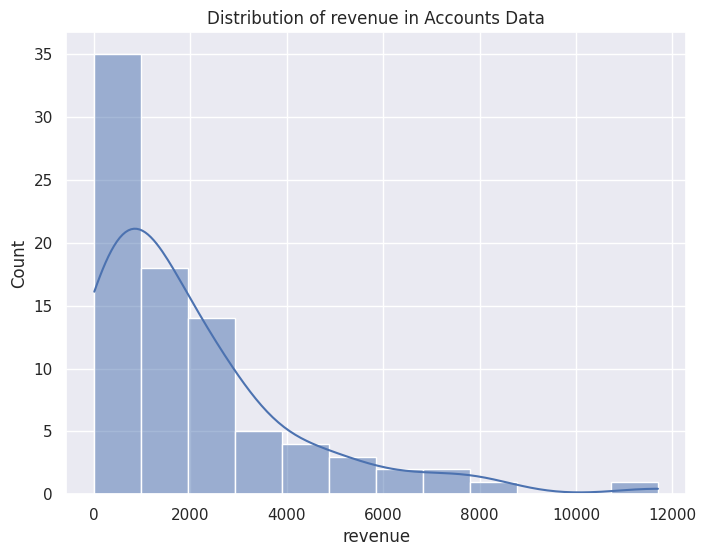


Descriptive Statistics for Sales Pipeline Data:
        close_value
count   6711.000000
mean    1490.915512
std     2320.670773
min        0.000000
25%        0.000000
50%      472.000000
75%     3225.000000
max    30288.000000

Missing Values:
opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64


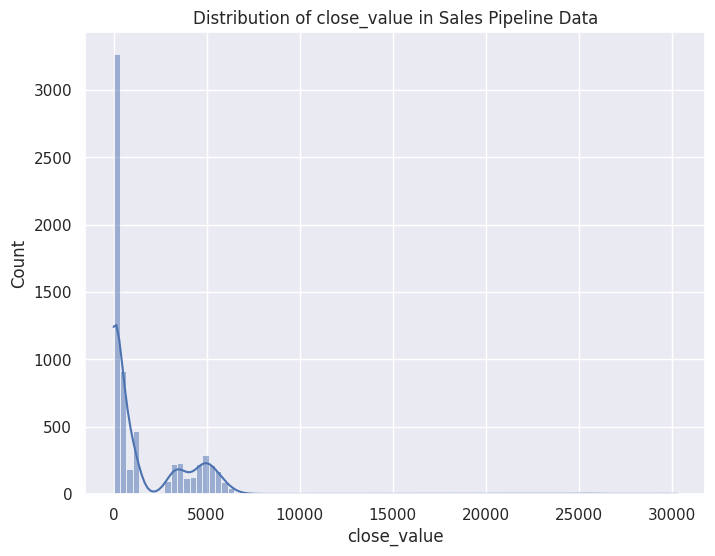


Descriptive Statistics for Sales Teams Data:
          sales_agent        manager regional_office
count              35             35              35
unique             35              6               3
top     Anna Snelling  Melvin Marxen            East
freq                1              6              12

Missing Values:
sales_agent        0
manager            0
regional_office    0
dtype: int64


In [6]:

# Descriptive stats for accounts data
display_stats(accounts_df, "Accounts Data")
plot_distributions(accounts_df, 'revenue', "Accounts Data")

# Descriptive stats for sales pipeline data
display_stats(sales_df, "Sales Pipeline Data")
plot_distributions(sales_df, 'close_value', "Sales Pipeline Data")

# Descriptive stats for sales teams data
display_stats(sales_teams_df, "Sales Teams Data")

## **Data Manipulation**

In [7]:
# Subset/Slice on condition: Filter sales with close_value > 10000
high_value_sales = sales_df[sales_df['close_value'] > 10000]
print("\nHigh-Value Sales (close_value > 10000):")
print(high_value_sales.head())

# Filter variables using regex: Select columns containing 'sales' in their names
sales_columns = sales_df.filter(regex='sales', axis=1)
print("\nColumns with 'sales' in their names:")
print(sales_columns.head())

# Groupby and aggregate: Total sales by sales_agent
sales_by_agent = sales_df.groupby('sales_agent')['close_value'].sum().reset_index()
print("\nTotal Sales by Sales Agent:")
print(sales_by_agent)

# Groupby and aggregate: Average revenue by sector in accounts data
revenue_by_sector = accounts_df.groupby('sector')['revenue'].mean().reset_index()
print("\nAverage Revenue by Sector:")
print(revenue_by_sector)


High-Value Sales (close_value > 10000):
     opportunity_id      sales_agent  product        account deal_stage  \
59         XUSUEAV7     Elease Gluck  GTK 500         Zoomit        Won   
677        60UOBOEM  Rosalina Dieter  GTK 500   Groovestreet        Won   
1156       4V0S4BA3   Markita Hansen  GTK 500     Goodsilron        Won   
1825       JXUXBANJ  Rosalina Dieter  GTK 500  Y-corporation        Won   
2559       OUIK8VX3     Elease Gluck  GTK 500     Lexiqvolax        Won   

     engage_date  close_date  close_value  
59    2016-11-20  2017-03-09      25897.0  
677   2017-02-01  2017-06-07      30288.0  
1156  2017-02-27  2017-06-27      29617.0  
1825  2017-03-26  2017-04-05      25288.0  
2559  2017-04-19  2017-04-20      23746.0  

Columns with 'sales' in their names:
       sales_agent
0      Moses Frase
1  Darcel Schlecht
2  Darcel Schlecht
3      Moses Frase
4        Zane Levy

Total Sales by Sales Agent:
           sales_agent  close_value
0        Anna Snelling     